# Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


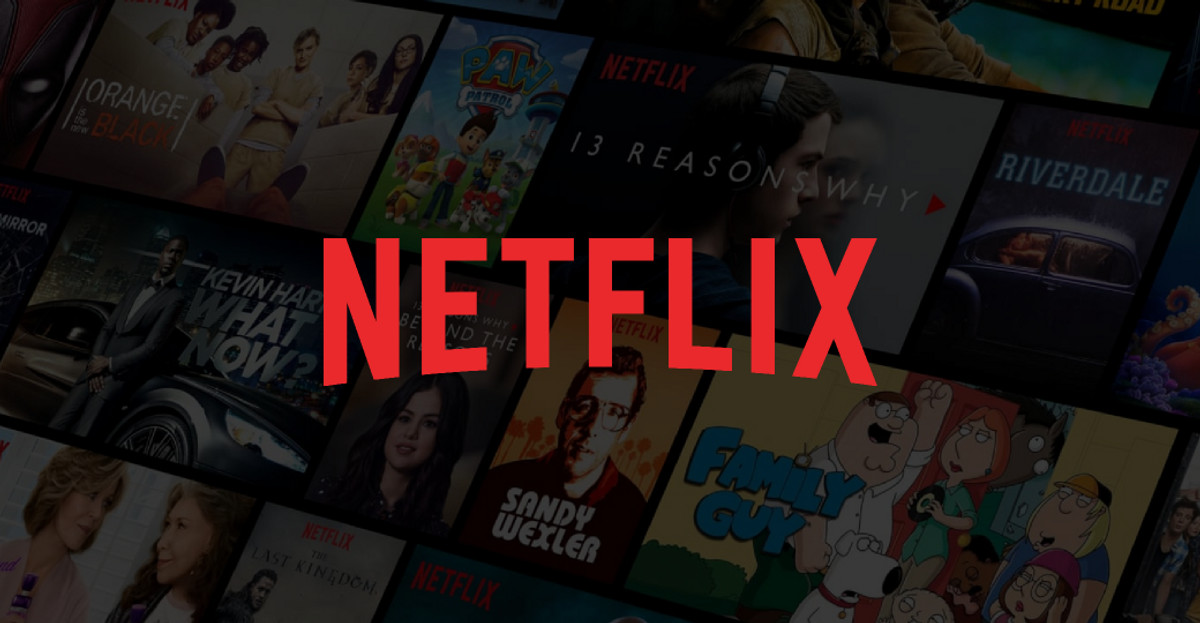

In [1]:
%matplotlib inline
from IPython.display import Image
Image(r"C:\Users\91931\Downloads\Images for projects\4e741369-be07-4f57-a540-988c018b082a-cover.png")

In [2]:

data = pd.read_csv(r"C:\Users\91931\Downloads\Intern\Dataset\netflix1.csv")

In [3]:
# Checking the first five rows of dataset.
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.shape

(8790, 10)

In [5]:
# Checking how many rows and columns are there in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# Data Cleaning

In [6]:
# Checking for missing values.
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
# Drop duplicates if present.
data.drop_duplicates(inplace=True)

In [8]:
# Convert date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [9]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# Exploratory Data Analysis (EDA)

In [10]:
# Content Type Distribution(Movies vs TV Shows)
type_counts = data['type'].value_counts()

Text(0.5, 0.98, 'Total Content on Netflix')

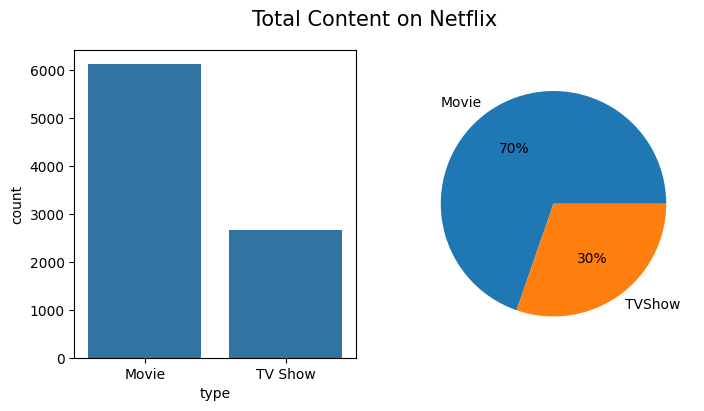

In [11]:
 # Plot the distribution
freq=data['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(data,x=data['type'],ax=axes[0])
plt.pie(freq,labels=['Movie','TVShow'],autopct='%.0f%%')
plt.suptitle('Total Content on Netflix',fontsize=15)



C:\Users\91931\AppData\Local\Temp\ipykernel_23332\3064046074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values,y=genre_counts.index,


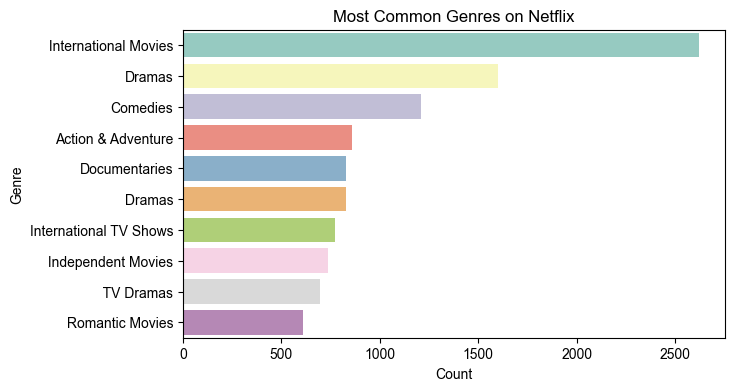

In [12]:
# Most Common Genres
# Split the 'listed_in' column and count genres

data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(7, 4))

sns.barplot(x=genre_counts.values,y=genre_counts.index,
palette='Set3')
sns.set_style("white")
# plt.grid(False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

C:\Users\91931\AppData\Local\Temp\ipykernel_23332\3954644039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


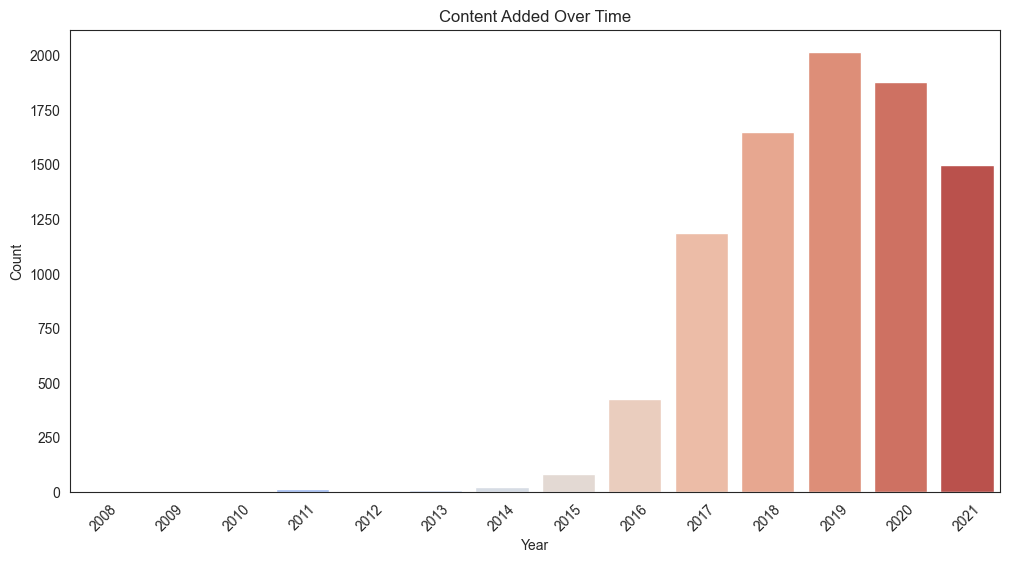

In [13]:
 ### Content Added Over Time
 
 # Extract year and month from 'date_added'
 
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

 # Plot content added over the years
 
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#  Conclusion and Insights
## In this project, we:
 1.Cleaned the data by handling missing values, removing duplicates, and
   converting data types.

 2.Explored the data through various visualizations such as bar plots.

 3.Analyzed content trends over time and identified popular genres.

In [14]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [15]:
data.describe()

,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


In [16]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 86, dtype: int64

## Top Countries with most Content on Netflix

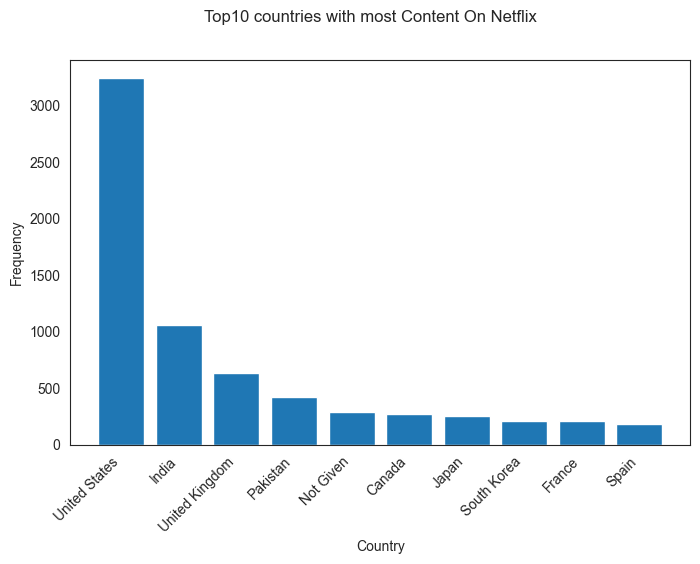

In [17]:

 
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
plt.figure(figsize=(8,5))
plt.bar(top_ten_countries['country'],
top_ten_countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top10 countries with most Content On Netflix")
plt.show()

In [18]:
# Creating new variable for year, month and day.
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

###  Monthly releases of Movies and TV shows on Netflix

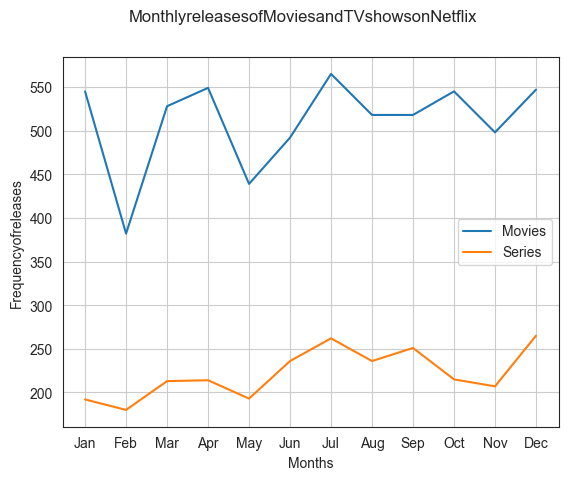

In [19]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index,
monthly_movie_release.values,label='Movies')
plt.plot(monthly_series_release.index,
monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequencyofreleases")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("MonthlyreleasesofMoviesandTVshowsonNetflix")
plt.show()

### Top 15 directors across Netflix with high frequency of movies and shows.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese'),
  Text(9, 0, 'Youssef Chahine'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

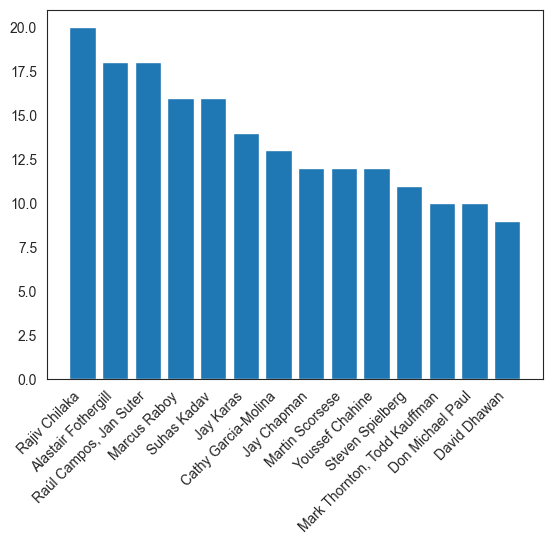

In [20]:

directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')

# Preditcive Analysis

In [21]:
#Convert duration into numeric:
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91931\AppData\Local\Temp\ipykernel_23332\3712832644.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)


In [22]:
# Encode categorical variables[Label Encoding or One-Hot encoding]

from sklearn.preprocessing import LabelEncoder

label_cols = ['rating','director','country']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

In [23]:
# Prepare Features and target

features = ['release_year','duration_num','rating','country','year','month']
X = data[features].dropna()
Y = data.loc[X.index, 'type'].apply(lambda x:1 if x == 'Movie' else 0) #Binary Target

In [24]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [25]:
# Train a model(Random Forest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("Classification Report:\n", classification_report(Y_test,Y_pred))


Accuracy: 0.997155858930603
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       520
           1       1.00      1.00      1.00      1238

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

